# Captains log, Stardate 160424 week.

## Main Aims: Get the batch runs off!

working through general batch errors/ mistakes on [vgg16 batch loop file](/notebooks/antvis/antvis/optics/Batchcode/vgg_16_finetune_bigloop_vgg16-BATCHING.ipynb)



Table of f lin layer size for batched data - batch size 16


model vgg16
|Resolution|first lin layer value|
|----------|---------------------|
|452,144   | 129024              |
|226,72    |  64512              |
|113,36    |14336                |
|57,18     |14336                |
|29,9      ||
|15,5      ||
|8,3       ||

Batch size 64

|Resolution|size|
|----------|--|
|452, 144|129024|
|226,72|64512|
|113,36|14336|
|57,18||
|29,9||
|15,5||
|8,3||

Memory ISSUEs back for batch sizes 64 and 32. 
batch size of 16 seems abolutley fine

- during this I was able to catch a misfunctioning function - one that had been moved over from ImageProcessor, but had missed the bottom half - blank_padding. it was checking whether to resize images, for vgg16 and 7c3l, that were too large, but missed the section where the blankk average grey padding was added to the images.
- all fixed.
- next is to get the random images printed. I can print the images fine.  just need to calc random values.

- probs calc them in the main function so I can count. and input this as a boolean parameter

Not 100% sure but it seems that the memory issue was an issue to do with the model being able to accept bacthed data

what this was, was the flatten function in the architecture. for batched data needed the argument start_dim=1

example:
BEFORE


 def forward(self, x):
          x= self.conv_layers(x)
          x = x.flatten()
          x = x.squeeze()
          x = self.linear_1(x)
          return x

AFTER


 def forward(self, x):
          x= self.conv_layers(x)
          x = x.flatten(start_dim=1)     <----
          x = x.squeeze()
          x = self.linear_1(x)
          return x




Found as this was the only difference between the file for vgg16 and 2c2l
first file was duplicated. error occurs.

putting this parameter in has fixed the issue

have tested for batch size 64 on 2c2l AND 7c3l (largest of my models)
on epochs of 1 to check through all resolutions


next is to put in the random spitting out of images

then set them off properly


there does not appear to be a need to change the linear layer sizes - this was an issue before the flatten parameter was put in, was also getting problems around only one prediction, not a batch of predictions.

by adding the dimension parameter, the model new to expect to output batchs. it was no longer trying to process like 16 images into one prediction. this must have been taking up a lot of memory to.


In [14]:
# bacthes of 16

import random
import numpy as np

nums = [] 
for i in range(8):
    j = random.randrange(0,16)
    nums.append(j)
    i+=1

print(min(nums), max(nums))
    

5 14


Random sample works

prob

view function takes a scaling factor so that the displayed image can be seen by human eyes more clearly.

when saving the image, it is unnormalised so that it can be seen by human eyes. otherwise is just black.


so, if the image has already been * by the scaling factor

i want to consider this when de normalising

[min max pixel values](https://stackoverflow.com/questions/21117415/finding-the-value-of-the-min-and-max-pixel)

OG
[0 7 7] [255 255 255]


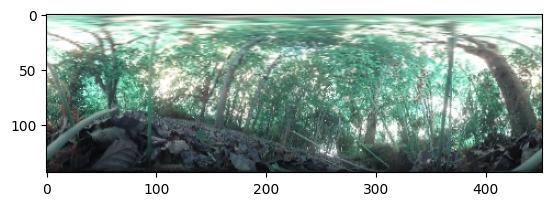

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 
 Normalsed
[0.         0.02745098 0.02745098] [1. 1. 1.]


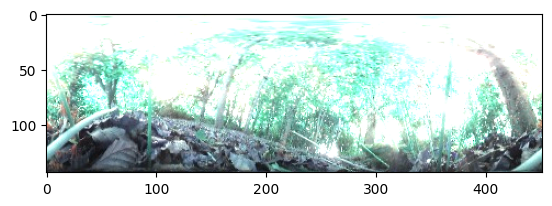

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 
 With scaling after norm
[0.        0.1372549 0.1372549] [5. 5. 5.]


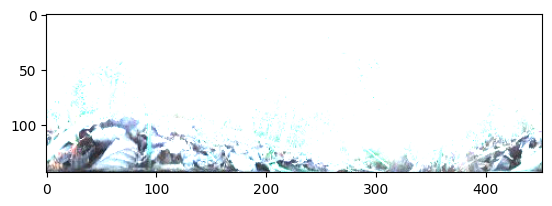

 
 de scale
[0.         0.02745098 0.02745098] [1. 1. 1.]


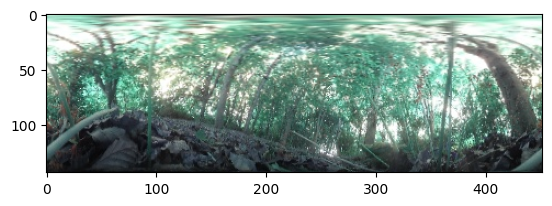

 
 re normalising ***


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 7. 7.] [255. 255. 255.]


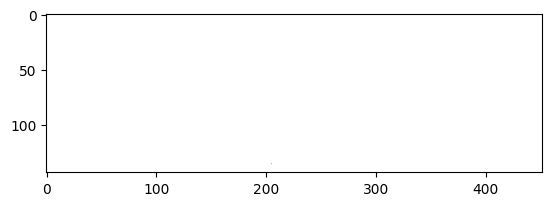


 what's the difference
[[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]

 [[ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]
  [ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]
  [ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]
  [ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]]

 [[ 0.00000000e+00  2.84217094e-14 -2.84217094e-14]
  [ 0.00000000e+00  2.84217094e-14 -2.84217094e-14]
  [ 0.00000000e+00  2.84217094e-14 -2.84217094e-14]
  ...
  [ 0.00000000e+00  2.84217094e-14 -2.84217094e-14]
  [ 0.00000000e+00  2.84217094e-14 -2.84217094e-14]
  [ 0.00000000e+00  2.84217094e-14 -2.84217094e-14]]

 ...

 [[ 0.0000

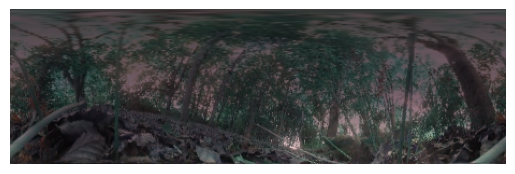

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.         0.01982273 0.02239662] [0.9357909 0.8099029 0.8062785]
 
 times norm [0.        5.0547953 5.711139 ] [238.62668 206.52524 205.60103] 

 
 de normalised


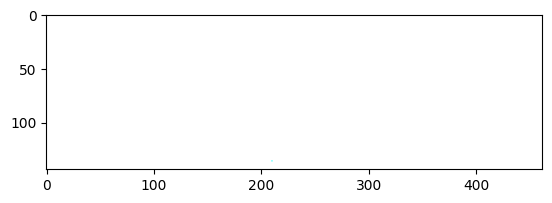

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 
 div scale  [0.        5.0547953 5.711139 ] [238.62668 206.52524 205.60103] 

 
 de norm and scale


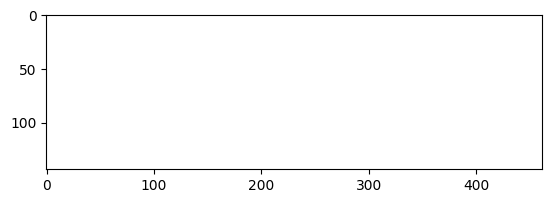

In [34]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../.')
from functions import ImageProcessor

norm = 255

scale = 5

data_path = r'/its/home/nn268/antvis/antvis/optics/AugmentedDS_IDSW/'
idx = 4

images= []
for file in os.listdir(data_path):
    if file[:4]== 'IDSW':
        if len(images) >= 10:
            break
        else:
            images.append(data_path+file)
        

img = cv2.imread(images[idx])
img= np.array(img)

print('OG')
print(img.min(axis=(0,1)), img.max(axis=(0,1)))
plt.imshow(img)
plt.show()

print(' \n Normalsed')
norm_im = img/ 255 #norm
print(norm_im.min(axis=(0,1)), norm_im.max(axis=(0,1)))
plt.imshow(norm_im*2)
plt.show()

print(' \n With scaling after norm')
scale_im = norm_im*scale
print(scale_im.min(axis=(0,1)), scale_im.max(axis=(0,1)))
plt.imshow(scale_im)
plt.show()


print(' \n de scale')
descale_im = scale_im / scale
print(descale_im.min(axis=(0,1)), descale_im.max(axis=(0,1)))
plt.imshow(descale_im)
plt.show()

print(' \n re normalising ***')
#reverse_im = np.round(descale_im*norm,0)
reverse_im = descale_im * 255
print(reverse_im.min(axis=(0,1)), reverse_im.max(axis=(0,1)))
plt.imshow(reverse_im)
plt.show()

print("\n what's the difference")
print(img-reverse_im)
print("  ")




print(" \n IP function with scale")
IP = ImageProcessor('cpu')

i = IP.colour_size_tense(img_path=img, col= 'colour', size=(452,144), av_lum=2,  pad=scale)
j =IP.view(i, scale, '',None,0,'') #img, scale:int, loop_run_name:str, save_dict:dict,  epoch:int, where:str
print(j.min(axis=(0,1)), j.max(axis=(0,1)))

j = j* norm
print(" \n times norm",j.min(axis=(0,1)), j.max(axis=(0,1)),"\n")
print(" \n de normalised")
plt.imshow(j)
plt.show()

print(" \n div scale ",j.min(axis=(0,1)), j.max(axis=(0,1)),"\n")
j= (j/scale) +50
print(" \n de norm and scale")
plt.imshow(j)
plt.show()

## Saving is Fixed!!

Added a cv2.normalise before saving the image worked



res = cv2.normalize(img, dst=None, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

cv2.imwrite(f"{save_dict['save_location']}_randImg{loop_run_name}_{epoch}_{where}.png", res) #*255


# The JSON problem
- one json file, not one per config
### dealt with!